# Finite difference approximation

In this notebook we approximate the solution to the diffusion equation with the finite-difference method.

In [1]:
import os, sys
sys.path.append(os.path.join(os.getcwd(), "../"))
import FDSolver
import numpy as np
import matplotlib.pyplot as plt
import plotter

In [2]:
#Initializing FDSolvers

#For dx = 1/10
x10 = np.linspace(0, 1, 10)
initial_condition = np.sin(np.pi*x10)

dx = x10[-1]/len(x10)
dt = 0.2*(1/100)**2

dx10 = np.zeros((int(1/dt), len(x10))) 
dx10[0, :] = initial_condition

Solver_dx10 = FDSolver.FDSolver(initial_condition, dx, dt)

#For dx = 1/100
x100 = np.linspace(0, 1, 100)
initial_condition = np.sin(np.pi*x100)

dx = x100[-1]/len(x100)
dt = 0.2*(1/100)**2

dx100 = np.zeros((int(1/dt), len(x100)))
dx100[0, :] = initial_condition

Solver_dx100 = FDSolver.FDSolver(initial_condition, dx, dt)

In [3]:
import time


#Saves the value for each point at each time-step
start = time.time()
for i in range(len(dx10)-1):
    Solver_dx10.evolve_fd()
    dx10[i+1, :] = Solver_dx10.u
time_difference = time.time() - start

print(time_difference)

start = time.time()
for i in range(len(dx100)-1):
    Solver_dx100.evolve_fd()
    dx100[i+1, :] = Solver_dx100.u
time_difference = time.time() - start
print(time_difference)

1.3389246463775635
1.2520208358764648


In [4]:
#time axis and time points for plotting
t = np.linspace(0, 1, int(1/dt))
t1_index = int(len(t)*0.1)
t2_index = int(len(t)*0.3)

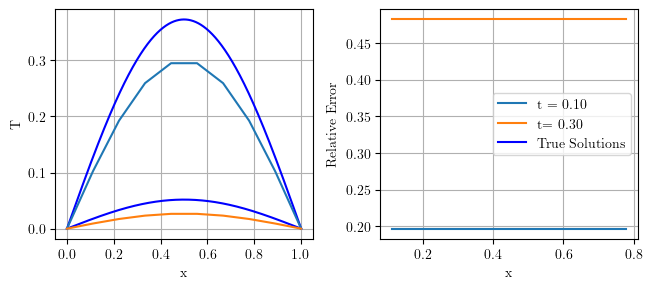

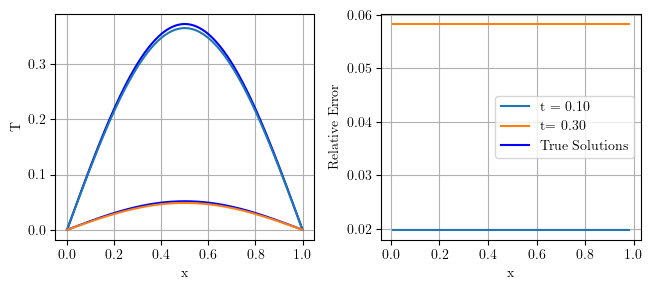

In [5]:

fig1 = plotter.plot_fd_solutions(dx10, x10, t, t1_index, t2_index)
fig2 = plotter.plot_fd_solutions(dx100, x100, t, t1_index, t2_index)

fig1.savefig('../Plots/dx10.pdf')
fig2.savefig('../Plots/dx100.pdf')

plt.show()